Play Random Agent vs Random Agent to get baseline to beat.

In [5]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import knucks
from agents.random_agent import RandomAgent
from agents.simple_q_learning import QLearningAgent
from training.reward_models import calculate_reward_per_win

In [6]:
# Initialize two RandomAgent instances for the players
player1 = QLearningAgent()
player2 = RandomAgent()

In [7]:
# Function to simulate a single game between two RandomAgents using the play_game method
def simulate_game_with_play_game():
    return knucks.play_game(player1, player2, False, calculate_reward_per_win)


num_games = 1000
results = []
p1_current_wins = 0
p2_current_wins = 0
for _ in range(num_games):
    result = simulate_game_with_play_game()
    results.append(result)
    if result == 1:
        p1_current_wins += 1
    elif result == 2:
        p2_current_wins += 1
    p1_win_rate = p1_current_wins / (_ + 1)
    # print on every 10% of the games
    if (_ + 1) % (num_games // 10) == 0:
        print(f"Game {_ + 1} - Player 1 win rate: {p1_win_rate:.2f}")

results = np.array(results)

# Calculate cumulative wins for each player
player1_cumulative_wins = np.cumsum(results == 1)
player2_cumulative_wins = np.cumsum(results == 2)

Game 1 - Player 1 win rate: 1.00
Game 2 - Player 1 win rate: 1.00
Game 3 - Player 1 win rate: 1.00
Game 4 - Player 1 win rate: 0.75
Game 5 - Player 1 win rate: 0.60
Game 6 - Player 1 win rate: 0.67
Game 7 - Player 1 win rate: 0.57
Game 8 - Player 1 win rate: 0.62
Game 9 - Player 1 win rate: 0.56
Game 10 - Player 1 win rate: 0.60
Game 11 - Player 1 win rate: 0.55
Game 12 - Player 1 win rate: 0.58
Game 13 - Player 1 win rate: 0.54
Game 14 - Player 1 win rate: 0.50
Game 15 - Player 1 win rate: 0.47
Game 16 - Player 1 win rate: 0.50
Game 17 - Player 1 win rate: 0.47
Game 18 - Player 1 win rate: 0.44
Game 19 - Player 1 win rate: 0.47
Game 20 - Player 1 win rate: 0.45
Game 21 - Player 1 win rate: 0.48
Game 22 - Player 1 win rate: 0.50
Game 23 - Player 1 win rate: 0.52
Game 24 - Player 1 win rate: 0.50
Game 25 - Player 1 win rate: 0.48
Game 26 - Player 1 win rate: 0.50
Game 27 - Player 1 win rate: 0.48
Game 28 - Player 1 win rate: 0.46
Game 29 - Player 1 win rate: 0.48
Game 30 - Player 1 win 

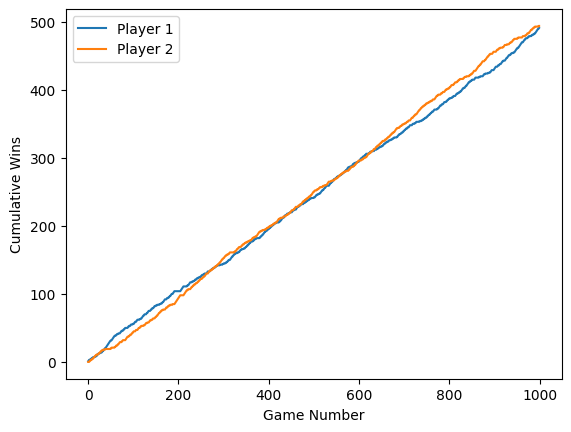

In [8]:
# Plotting
plt.plot(player1_cumulative_wins, label='Player 1')
plt.plot(player2_cumulative_wins, label='Player 2')
plt.xlabel('Game Number')
plt.ylabel('Cumulative Wins')
plt.legend()
plt.show()